<a href="https://colab.research.google.com/github/Chrostowska/Code/blob/main/Lesson_1_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%tensorflow_version 2.x #for work with online notebook


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output #for that notebook
from six.moves import urllib #for this notebook

import tensorflow.compat.v2.feature_column as fc #feature columns
import tensorflow as tf

In [4]:
#we need to split dataset before on 2 datasets so alghoritm will not seen datas for validation


dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
#print(dftrain.head()) we have all columns
y_train = dftrain.pop('survived') #deleting column survived and safe it in variable y_train
y_eval = dftest.pop('survived')
print(dftrain.head())
print(y_train.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [32]:
print(dftrain.to_string())

        sex    age  n_siblings_spouses  parch      fare   class     deck  embark_town alone
0      male  22.00                   1      0    7.2500   Third  unknown  Southampton     n
1    female  38.00                   1      0   71.2833   First        C    Cherbourg     n
2    female  26.00                   0      0    7.9250   Third  unknown  Southampton     y
3    female  35.00                   1      0   53.1000   First        C  Southampton     n
4      male  28.00                   0      0    8.4583   Third  unknown   Queenstown     y
5      male   2.00                   3      1   21.0750   Third  unknown  Southampton     n
6    female  27.00                   0      2   11.1333   Third  unknown  Southampton     n
7    female  14.00                   1      0   30.0708  Second  unknown    Cherbourg     n
8    female   4.00                   1      1   16.7000   Third        G  Southampton     n
9      male  20.00                   0      0    8.0500   Third  unknown  Southa

In [9]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [10]:
print(dftrain['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


In [12]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [13]:
dftrain.shape

(627, 9)

<Axes: >

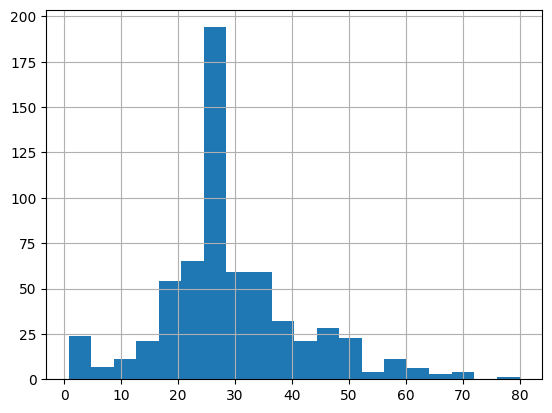

In [16]:
dftrain.age.hist(bins = 20)

<Axes: xlabel='sex'>

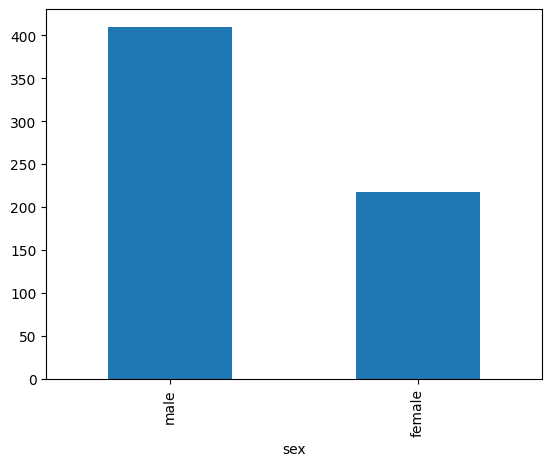

In [23]:
dftrain.sex.value_counts()
dftrain.sex.value_counts().plot(kind = 'bar')

<Axes: ylabel='class'>

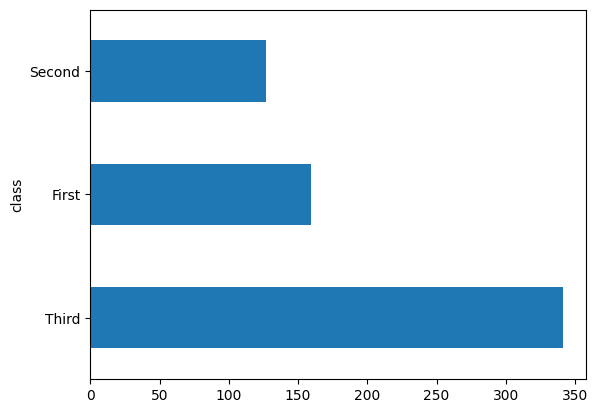

In [22]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survive')

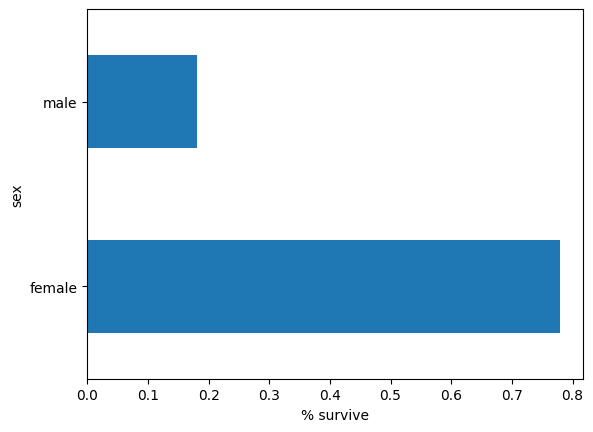

In [30]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% survive')